In [3]:
import pandas
import pickle
import pytz
import matplotlib.pyplot as plt
import time
import datetime

In [4]:
with open("host_streaming_stats/list_of_df_other_notebooks_1616553245.325566.pkl",'rb') as handl:
    lst_of_df = pickle.load(handl)

In [5]:
len(lst_of_df)

3

In [6]:
lst_of_df[0].keys()

dict_keys(['id', 'path', 'name', 'type', 'kernel', 'notebook', 'pid', 'df'])

In [7]:
df = lst_of_df[0]['df']

In [8]:
df.shape

(600, 117)

In [9]:
df.head()

,CPU percent for 0,CPU percent for 1,CPU percent for 2,CPU percent for 3,CPU percent for 4,CPU percent for 5,CPU percent for 6,CPU percent for 7,CPU percent for 8,CPU percent for 9,...,process memory: vms,process memory: pfaults,process memory: pageins,process memory: uss,process cpu times: user,process cpu times: system,process cpu times: children_user,process cpu times: children_system,process number context switches: voluntary,process number context switches: involuntary
0,25.3,0.2,19.3,0.2,14.4,0.1,12.1,0.1,9.1,0.1,...,4724727808,23531,823,49836032,0.489987,0.146503,0.0,0.0,140728898422242,0
1,19.4,0.0,16.7,0.0,8.4,0.0,9.3,0.0,4.7,0.9,...,4724727808,23531,823,49836032,0.490010,0.146514,0.0,0.0,140728898422243,0
2,22.0,0.0,20.0,0.0,12.6,0.0,12.6,0.0,10.8,0.0,...,4724727808,23531,823,49836032,0.490036,0.146529,0.0,0.0,140728898422244,0
3,20.0,0.0,17.6,0.0,10.2,0.0,9.3,0.9,7.4,0.0,...,4724727808,23531,823,49836032,0.490061,0.146544,0.0,0.0,140728898422245,0
4,12.1,0.9,15.7,0.0,8.4,0.0,2.8,0.0,3.7,0.0,...,4724727808,23531,823,49836032,0.490086,0.146565,0.0,0.0,140728898422246,0


plot a single column

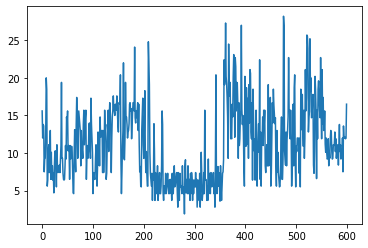

In [10]:
plt.plot(df['CPU 1 times user']);

plot a single column as a scatter plot

unlike a line plot, scatter requires two inputs. Here we'll use the index of the series as the x axis

In [11]:
df['CPU 1 times user'].head()

0    15.6
1    12.0
2    13.8
3    13.6
4     7.5
Name: CPU 1 times user, dtype: float64

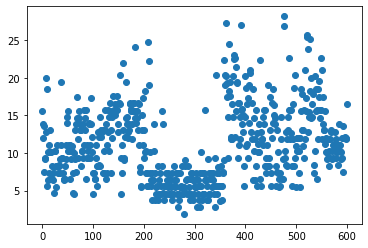

In [12]:
plt.scatter(x=df['CPU 1 times user'].index,y=df['CPU 1 times user'].values);

do any of the columns have the word "seconds" present?

In [13]:
for this_col in list(df.columns):
    if ('seconds') in this_col:
        print(this_col)

time in unix seconds


In [14]:
df['time in unix seconds'].head()

0    1.616553e+09
1    1.616553e+09
2    1.616553e+09
3    1.616553e+09
4    1.616553e+09
Name: time in unix seconds, dtype: float64

That's number of seconds since Unix Epoch - https://en.wikipedia.org/wiki/Unix_time

We can get the current number of seconds using time:

In [15]:
time.time()

1616553829.599954

Rather than use the index as the x-axis label, let's try the unix time stamp

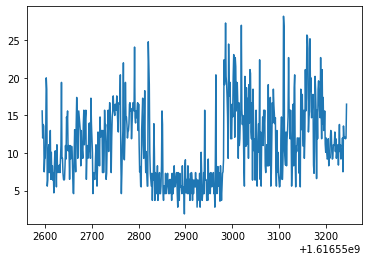

In [16]:
plt.plot(df['time in unix seconds'],df['CPU 1 times user']);

The timestamp is not much more helpful than the integer index, and perhaps more confusing. 

We can convert the float to a datetime object:<BR>
https://stackoverflow.com/questions/3682748/converting-unix-timestamp-string-to-readable-date

In [17]:
datetime.datetime.utcfromtimestamp(df['time in unix seconds'][0])

datetime.datetime(2021, 3, 24, 2, 23, 14, 328610)

Apply that same transformation to each element in the column using an unnamed function (hence the lambda keyword)

In [18]:
df['datetime'] = df['time in unix seconds'].apply(lambda x: datetime.datetime.utcfromtimestamp(x))
df['datetime'].head()

0   2021-03-24 02:23:14.328610
1   2021-03-24 02:23:15.404009
2   2021-03-24 02:23:16.503925
3   2021-03-24 02:23:17.590095
4   2021-03-24 02:23:18.667900
Name: datetime, dtype: datetime64[ns]

<BR>
Now the dataframe has two equivalent columns with different types - a float and a datetime

In [19]:
for this_col in list(df.columns):
    if ('date' in this_col) or ('second' in this_col):
        print(this_col)

time in unix seconds
datetime


<BR>
Let's view these two columns side-by-side

In [20]:
df[['datetime','time in unix seconds']].head()

,datetime,time in unix seconds
0,2021-03-24 02:23:14.328610,1.616553e+09
1,2021-03-24 02:23:15.404009,1.616553e+09
2,2021-03-24 02:23:16.503925,1.616553e+09
3,2021-03-24 02:23:17.590095,1.616553e+09
4,2021-03-24 02:23:18.667900,1.616553e+09


Revisit our previous visualization, but using the datetime object for the x-axis

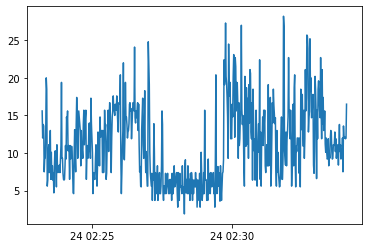

In [24]:
plt.plot(df['datetime'],df['CPU 1 times user']);

Matlab does some cleanup of the x-axis labels, but the labels overlap. 

One approach to address this is rotating the labels

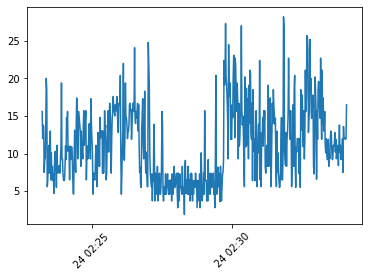

In [25]:
plt.plot(df['datetime'],df['CPU 1 times user']);
plt.xticks(rotation=45); # in degrees

That's more readable

Since we'll need to refer to the datetime for every column, converting the dataframe index from integers to datetime objects is useful

By default, the index is a range of integers

In [26]:
df.index

RangeIndex(start=0, stop=600, step=1)

To see the values of the dataframe index, convert the .index to a list

In [28]:
list(df.index)[0:10]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

we can set the index to be the values in the 'datetime' column<BR>
https://stackoverflow.com/questions/42941310/creating-pandas-dataframe-with-datetime-index-and-random-values-in-column

In [29]:
df = df.set_index('datetime')

In [30]:
df.head()

,CPU percent for 0,CPU percent for 1,CPU percent for 2,CPU percent for 3,CPU percent for 4,CPU percent for 5,CPU percent for 6,CPU percent for 7,CPU percent for 8,CPU percent for 9,...,process memory: vms,process memory: pfaults,process memory: pageins,process memory: uss,process cpu times: user,process cpu times: system,process cpu times: children_user,process cpu times: children_system,process number context switches: voluntary,process number context switches: involuntary
datetime,,,,,,,,,,,,,,,,,,,,,
2021-03-24 02:23:14.328610,25.3,0.2,19.3,0.2,14.4,0.1,12.1,0.1,9.1,0.1,...,4724727808,23531,823,49836032,0.489987,0.146503,0.0,0.0,140728898422242,0
2021-03-24 02:23:15.404009,19.4,0.0,16.7,0.0,8.4,0.0,9.3,0.0,4.7,0.9,...,4724727808,23531,823,49836032,0.490010,0.146514,0.0,0.0,140728898422243,0
2021-03-24 02:23:16.503925,22.0,0.0,20.0,0.0,12.6,0.0,12.6,0.0,10.8,0.0,...,4724727808,23531,823,49836032,0.490036,0.146529,0.0,0.0,140728898422244,0
2021-03-24 02:23:17.590095,20.0,0.0,17.6,0.0,10.2,0.0,9.3,0.9,7.4,0.0,...,4724727808,23531,823,49836032,0.490061,0.146544,0.0,0.0,140728898422245,0
2021-03-24 02:23:18.667900,12.1,0.9,15.7,0.0,8.4,0.0,2.8,0.0,3.7,0.0,...,4724727808,23531,823,49836032,0.490086,0.146565,0.0,0.0,140728898422246,0


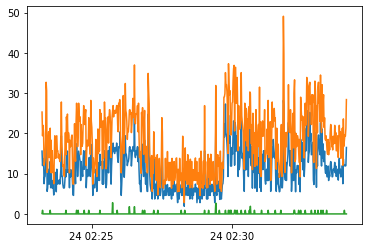

In [36]:
plt.plot(df['CPU 1 times user']);
plt.plot(df['CPU percent for 0']);
plt.plot(df['CPU percent for 9']);
